In [2]:
!pip install scikit-learn-intelex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 MB 8.8 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import uniform
from sklearn.tree import plot_tree
from sklearn import tree
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:
credit = pd.read_excel(r"/content/drive/MyDrive/Mining/Cleaned Dataset/CA2_Credit_risk_dataset_converted.xlsx", sheet_name='Sheet1')


In [6]:
#check the first 10 rows in the cleaned dataset
credit.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [7]:
print(credit.isna().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


DATA PREPARATION FOR MODELLING


Step 1: Encode all the categorical features

In [8]:
# Identify categorical features
categorical_features = credit.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_en = LabelEncoder()

# Apply LabelEncoder to each categorical feature
for r in categorical_features:
    credit[r] = label_en.fit_transform(credit[r])

print("DataFrame after encoding categorical features:")
credit.head(10)

DataFrame after encoding categorical features:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2
6,26,77100,3,8.0,1,1,35000,12.42,1,0.45,0,3
7,24,78956,3,5.0,3,1,35000,11.11,1,0.44,0,4
8,24,83000,3,8.0,4,0,35000,8.90,1,0.42,0,2
9,21,10000,2,6.0,5,3,1600,14.74,1,0.16,0,3


Step 2: Define the input(x) and output(y) features in the dataset.


In [16]:
# X is for input(numerical) features and y is for target feature
a = 'loan_status' # Changed target variable to 'Credit_Score' as it is the appropriate output variable
X = credit.drop(columns=[a])  # Using the correct DataFrame
y = credit[a]

Step 3: Split the dataset into Train & Test sets

In [10]:
##For the dataset containing all the features
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

Step 4: Perform Feature Scaling on the train and test sets


In [11]:
###Standardize the data using the mean and standard deviation computed from the training.
scaler = StandardScaler()

## For the dataset containing all the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**1. DECISION TREE**

Step 1: Perform Hyperparameter Tuning to get the best parameters and build the model with these parameters.


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters for All Features: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-validation accuracy For All Features: 0.93

Accuracy of Decision Tree classifier: 0.92

Classification Report For All Features:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5095
           1       0.94      0.70      0.80      1422

    accuracy                           0.92      6517
   macro avg       0.93      0.84      0.88      6517
weighted avg       0.93      0.92      0.92      6517



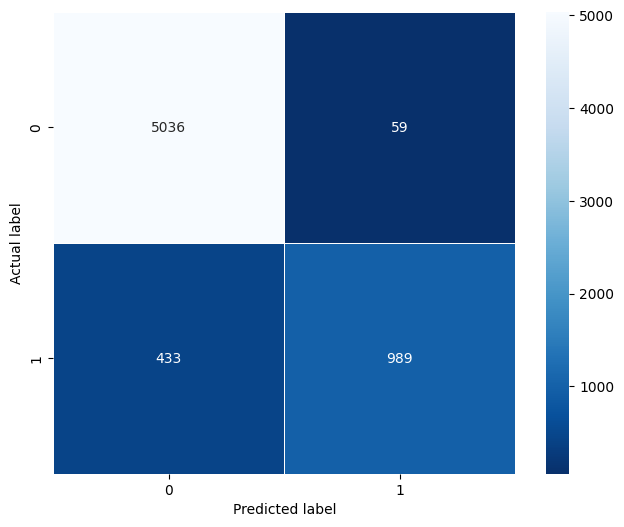

In [12]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters for All Features: {best_params}")
print(f"Best cross-validation accuracy For All Features: {best_score:.2f}")

# Train the final classifier with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predict the response for the test dataset with the pruned tree
y_pred = best_clf.predict(X_test)

# Evaluate the accuracy of the classifier after pruning
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy of Decision Tree classifier: {accuracy:.2f}')

# Display a classification report to understand the classifier's performance
print("\nClassification Report For All Features:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Step 2: Perform Pruning to improve accuracy


Accuracy of Decision Tree classifier after pruning: 0.90

Classification Report after Pruning:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      5095
           1       0.95      0.57      0.71      1422

    accuracy                           0.90      6517
   macro avg       0.92      0.78      0.83      6517
weighted avg       0.90      0.90      0.89      6517



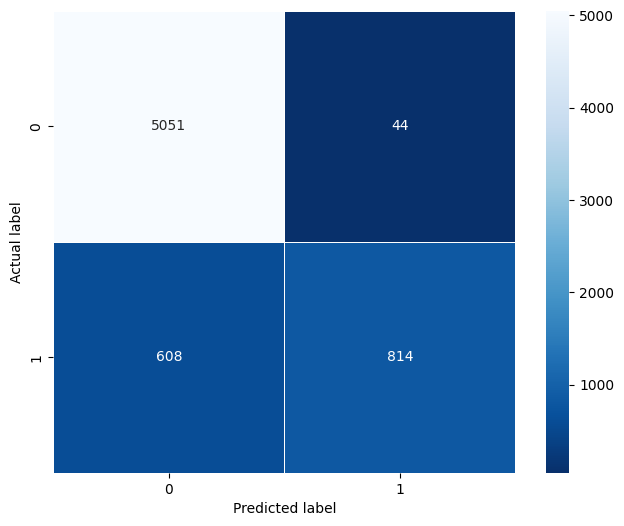

In [ ]:
# Obtain the effective alphas and the corresponding total leaf impurities
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Initialize variables to find the best alpha
best_alpha = 0
best_accuracy = 0

# Limit the number of ccp_alphas for performance reasons (for example, 10)
sampled_ccp_alphas = np.append([0], np.linspace(min(ccp_alphas), max(ccp_alphas), num=10))

# Iterate over a subset of ccp_alpha values to find the best one
for ccp_alpha in sampled_ccp_alphas:
    # Set the ccp_alpha parameter and train the classifier
    clf.set_params(ccp_alpha=ccp_alpha)

    # Perform cross-validation and compute the mean accuracy
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
    accuracy = scores.mean()

    # Check if this alpha gives us the best accuracy
    if accuracy > best_accuracy:
        best_alpha = ccp_alpha
        best_accuracy = accuracy

# Train the final classifier with the best alpha
clf.set_params(ccp_alpha=best_alpha)
clf.fit(X_train, y_train)

# Predict the response for the test dataset with the pruned tree
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier after pruning
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy of Decision Tree classifier after pruning: {accuracy:.2f}')

# Display a classification report to understand the classifier's performance after pruning
print("\nClassification Report after Pruning:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix after pruning
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**2. RANDOM FOREST**

Step 1: Carry out Hyperparameter tuning and build the model with the best parameters.


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['sqrt', 'log2']  # Removed 'auto'
}

# Setup RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_distributions, n_iter=10,
                                      cv=4, scoring='accuracy', n_jobs=-1,
                                      random_state=42, verbose=3)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Random Forest Parameters for All Features:", random_search_rf.best_params_)
print("Best Random Forest Cross-Validation Score for All Features:", random_search_rf.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Random Forest Parameters for All Features: {'max_depth': 73, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 559}
Best Random Forest Cross-Validation Score for All Features: 0.92963474524248


Step 2: Evaluate the results

Best model accuracy: 93.16%
Best model precision: 93.40%
Best model recall: 93.16%
Best model F1 score: 92.76%
Best model confusion matrix:
[[5060   35]
 [ 411 1011]]


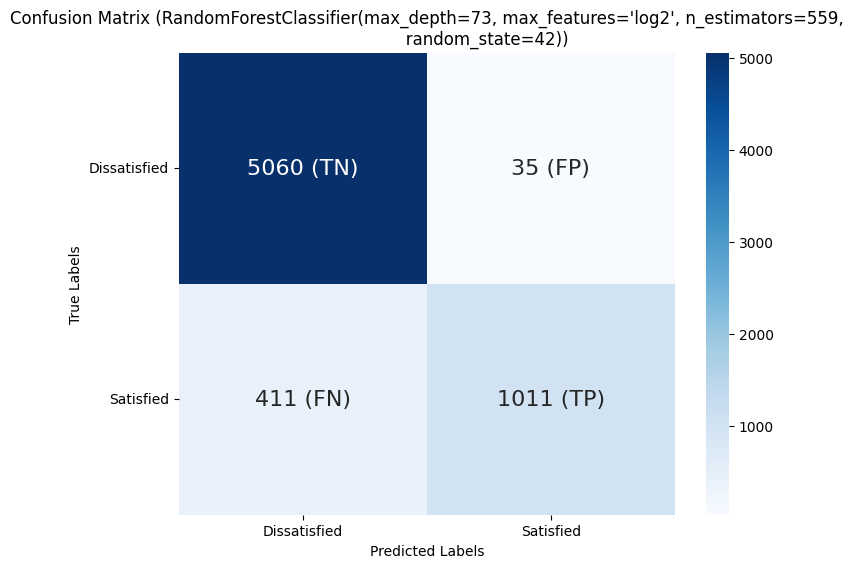

In [15]:
# Evaluate the best model on the testing data
best_model = random_search_rf.best_estimator_
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best, average='weighted')
best_recall = recall_score(y_test, y_pred_best, average='weighted')
best_f1 = f1_score(y_test, y_pred_best, average='weighted')
best_conf_matrix = confusion_matrix(y_test, y_pred_best)

print(f'Best model accuracy: {best_accuracy * 100:.2f}%')
print(f'Best model precision: {best_precision * 100:.2f}%')
print(f'Best model recall: {best_recall * 100:.2f}%')
print(f'Best model F1 score: {best_f1 * 100:.2f}%')
print('Best model confusion matrix:')
print(best_conf_matrix)

#visualize the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)

# Create the combined annotation matrix
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
annot = np.empty_like(cm).astype(str)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f'{cm[i, j]} ({labels[i, j]})'

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', annot_kws={"size": 16})

# Customize plot
plt.title(f'Confusion Matrix ({best_model})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=['Dissatisfied', 'Satisfied'])
plt.yticks(ticks=[0.5, 1.5], labels=['Dissatisfied', 'Satisfied'], rotation=0)
plt.show()

**3. GRADIENT BOOSTING**

Step 1:

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split

# Define the model
hgb = HistGradientBoostingClassifier(random_state=42)

# Define the parameter grid
param_distributions = {
    'learning_rate': uniform(0.01, 0.3),       # Learning rate: small values for smoother updates
    'max_iter': randint(100, 1000),             # Number of boosting iterations
    'max_leaf_nodes': randint(10, 100),        # Maximum leaf nodes per tree
    'max_depth': randint(3, 25),              # Maximum depth of the tree
    'min_samples_leaf': randint(5, 50),      # Minimum number of samples per leaf
    'max_bins': randint(128, 300),            # Number of bins for continuous features
}

# Setup RandomizedSearchCV
random_search_hgb = RandomizedSearchCV(hgb, param_distributions=param_distributions, n_iter=10,  # Number of random samples
                                       cv=4, scoring='accuracy', n_jobs=-1,
                                       random_state=42, verbose=3)

# Fit RandomizedSearchCV
random_search_hgb.fit(X_train, y_train)

# Best parameters and score
print("Best HistGradientBoosting Parameters:", random_search_hgb.best_params_)
print("Best HistGradientBoosting Cross-Validation Score:", random_search_hgb.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
4 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

Best HistGradientBoosting Parameters: {'learning_rate': 0.05680559213273095, 'max_bins': 202, 'max_depth': 13, 'max_iter': 187, 'max_leaf_nodes': 33, 'min_samples_leaf': 7}
Best HistGradientBoosting Cross-Validation Score: 0.9352363413136895


Double-click (or enter) to edit

Best model accuracy: 93.48%
Best model precision: 93.77%
Best model recall: 93.48%
Best model F1 score: 93.10%
Best model confusion matrix:
[[5071   24]
 [ 401 1021]]


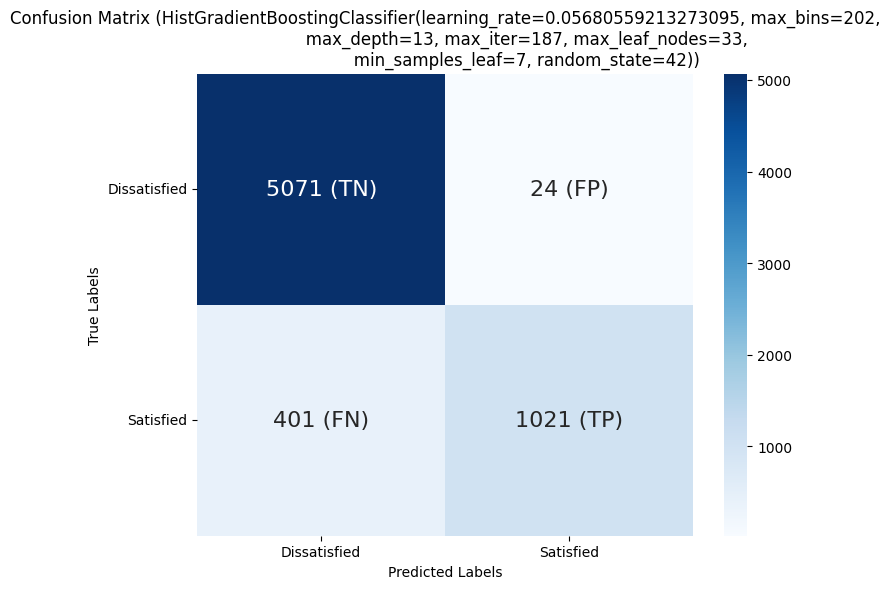

In [ ]:
# Evaluate the best model on the testing data
best_model = random_search_hgb.best_estimator_
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best, average='weighted')
best_recall = recall_score(y_test, y_pred_best, average='weighted')
best_f1 = f1_score(y_test, y_pred_best, average='weighted')
best_conf_matrix = confusion_matrix(y_test, y_pred_best)

print(f'Best model accuracy: {best_accuracy * 100:.2f}%')
print(f'Best model precision: {best_precision * 100:.2f}%')
print(f'Best model recall: {best_recall * 100:.2f}%')
print(f'Best model F1 score: {best_f1 * 100:.2f}%')
print('Best model confusion matrix:')
print(best_conf_matrix)

#visualize the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)

# Create the combined annotation matrix
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
annot = np.empty_like(cm).astype(str)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f'{cm[i, j]} ({labels[i, j]})'

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', annot_kws={"size": 16})

# Customize plot
plt.title(f'Confusion Matrix ({best_model})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=['Dissatisfied', 'Satisfied'])
plt.yticks(ticks=[0.5, 1.5], labels=['Dissatisfied', 'Satisfied'], rotation=0)
plt.show()